Importing modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1. Loading the data and separating it to x and y
2. Chaning the separator from , to ;
3. Turning scientific format to numeric float values using lambda.

In [2]:
tab = pd.read_csv("../Data/DataHeight.csv", sep=';', converters={'age': lambda x: float(x), 'height': lambda x: float(x)})
x=tab["age"]
y=tab["height"]

plotting the function y=f(x)

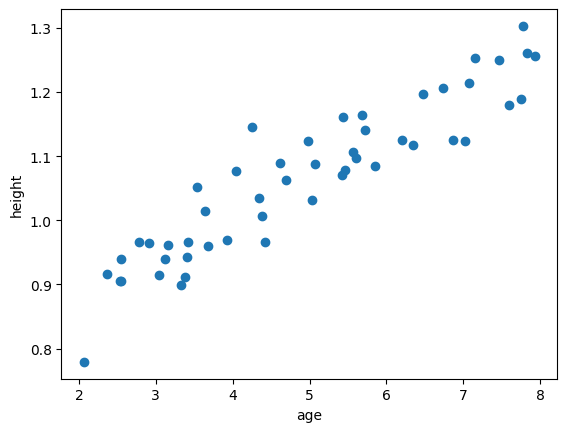

In [3]:
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("height")
plt.show()

As we can see there is linear relation between the age and height.The bigger the age the bigger the height gets

`
  x=2.91 => y=0.964
  x=4.61  => y=1.089
`

proving statistically that x and y are correlated

In [4]:
from scipy.stats import pearsonr
correlation,pvalue=pearsonr(x,y)
print(correlation)

0.9263170211762402


The correlation is above 0.9 which means there is strong positive relation between height and age.

To find theta zero and one two we gonna use gradient descent.
1. First we need to create X_b that adds a new column to x which is the bias(y_intercept)
2. Second we need to create a numpy array from y.
3. Both with this dimionsion nx1.where n is number of training examples.

In [5]:
X_b = np.c_[x,np.ones((len(x), 1))]
y_np=np.array(y).reshape(-1,1)

This the function for batch gradient descent 

In [6]:
def batch_gradient_descent(x, y, learning_rate=0.01, n_epochs=1000):
    m = len(y)
    theta = np.random.randn(2,1) # Random initialization
    for epoch in range(n_epochs):
        gradients = 2 / m * x.T.dot(x.dot(theta)-y)
        theta = theta - learning_rate * gradients    
    return theta

caclulating theta_0 and theta_1.

In [7]:
theta=batch_gradient_descent(X_b,y_np)
print(theta)

[[0.11326464]
 [0.47873167]]


theta_0~=0.0691 and theta_1~=0.7213

calculating the mean of sum of squared error MSE 

In [8]:
y_predict=X_b.dot(theta)
residuals=y_np-y_predict
mse=np.mean(residuals**2)
print(mse)

0.00990647879967265


The equation of the regression line

`y=theta_0x+theta_1+error<=>y=0.0691*x+0.7213+0.0020`

plotting regression line

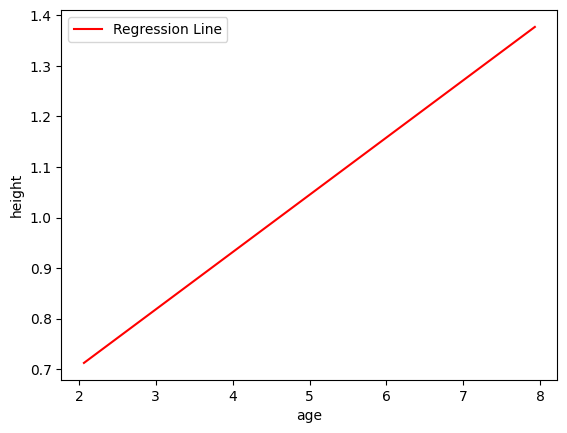

In [9]:
plt.plot(x, y_predict, color='red', label='Regression Line')
plt.xlabel("age")
plt.ylabel("height")
plt.legend()
plt.show()

predicting the heights for four boys with age 3,7,9,12

In [10]:
test=np.array([3,7,9,12]).reshape(-1,1)
test_b= np.c_[test, np.ones_like(test)]
test_predict=test_b.dot(theta)
print(test_predict)

[[0.81852558]
 [1.27158412]
 [1.49811339]
 [1.8379073 ]]
